# Wstęp do Sztucznej Inteligencji - rok akademicki 2020/2021

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie bayesowskie
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

In [1]:
!pip install pymc3==3.9.0 arviz==0.8.3 numpy==1.18.0

In [2]:
import pymc3 as pm
import arviz as az
import numpy as np
print('Pymc3 version:', pm.__version__)
print('Arviz version:', az.__version__)
print('Numpy version:', np.__version__)

Pymc3 version: 3.9.0
Arviz version: 0.8.3
Numpy version: 1.18.0


## Zadanie 1  (obowiązkowe, 5pkt.)
Zapożyczone z ćwiczeń do wykładu [Arabas, Cichosz](http://wazniak.mimuw.edu.pl/index.php?title=Sztuczna_inteligencja/SI_%C4%86wiczenia_4)

### Zamodeluj i odpowiedz na pytania.

W śledztwie dotyczącym zabójstwa inspektor Bayes rozważa dwie hipotezy:

- $H_1$ główny podejrzany zabił,
- $H_2$ główny podejrzany nie zabił, 

oraz następujące możliwe fakty:

- $E_1$ na miejscu zbrodni znaleziono odciski palców głównego podejrzanego,
- $E_2$ główny podejrzany nie ma alibi na czas popełnienia zabójstwa,
- $E_3$ główny podejrzany miał motyw zabicia ofiary,
- $E_4$ główny podejrzany był widziany w sądziedztwie miejsca, w którym mieszka nielegalny handlarz bronią,
- $E_5$ świadek zbrodni podał rysopis zabójcy nie pasujący do głównego podejrzanego. 

Zależności między takimi faktami a hipotezami opisują następujące prawdopodobieństwa:

$P(E_1|H_1)=0.7,\qquad P(E_1|H_2)=0.3,$

$P(E_2|H_1)=0.8,\qquad P(E_2|H_2)=0.4,$

$P(E_3|H_1)=0.9,\qquad P(E_3|H_2)=0.5,$

$P(E_4|H_1)=0.4,\qquad P(E_4|H_2)=0.2,$

$P(E_5|H_1)=0.2,\qquad P(E_5|H_2)=0.4.$ 

__W którym przypadku prawdopodobieństwo popełnienia zabójstwa byłoby największe?__

1. Gdyby znaleziono na miejscu zbrodni jego odciski palców.
2. Gdyby stwierdzono, że nie miał alibi i miał motyw.
3. Gdyby znaleziono na miejscu zbrodni jego odciski palców oraz stwierdzono, że był widziany w sąsiedztwie miejsca, w którym mieszka nielegalny handlarz bronią, ale świadek zbrodni podał rysopis zabójcy nie pasujący do głównego podejrzanego.

### TWÓJ PROGRAM:

In [3]:
#YOUR CODE HERE
with pm.Model() as zabojstwo_model:
    # zmienna zabojstwo o rozkładzie Bernoulliego z prawd. 0.5, 
    # z prawd. 0.5 True (zabojstwo), z prawd. 0.5 False (nie zabojstwo)
    zabojstwo = pm.Bernoulli('zabojstwo', 0.5)

    # prawd. odciskow palcow pod warunkiem zabojstwa
    # jeżeli zabojstwo to p_palce=0.7, jeżeli nie zabojstwo to p_palce=0.3
    p_palce = pm.Deterministic('p_palce', pm.math.switch(zabojstwo, 0.7, 0.3))
    # zmienna katar o rozkładie Bernoulliego
    palce = pm.Bernoulli('palce', p_palce)

    # prawd. braku alibi pod warunkiem zabojstwa
    # jeżeli zabojstwo to p_alibi=0.8, jeżeli nie zabojstwo to p_alibi=0.4
    p_alibi = pm.Deterministic('p_alibi', pm.math.switch(zabojstwo, 0.8, 0.4))
    # zmienna alibi o rozkładie Bernoulliego
    alibi = pm.Bernoulli('alibi', p_alibi)

    # prawd. motywu pod warunkiem zabojstwa
    # jeżeli zabojstwo to p_motyw=0.9, jeżeli nie zabojstwo to p_motyw=0.5
    p_motyw = pm.Deterministic('p_motyw', pm.math.switch(zabojstwo, 0.9, 0.5))
    motyw = pm.Bernoulli('motyw', p_motyw)

    # prawd. miejsca pod warunkiem zabojstwa
    # jeżeli zabojstwo to p_miejsce=0.4, jeżeli nie zabojstwo to p_miejsce=0.2
    p_miejsce = pm.Deterministic('p_miejsce', pm.math.switch(zabojstwo, 0.4, 0.2))
    miejsce = pm.Bernoulli('miejsce', p_miejsce)

    # prawd. rysopisu pod warunkiem zabojstwa
    # jeżeli zabojstwo to p_rysopis=0.2, jeżeli nie zabojstwo to p_rysopis=0.4
    p_rysopis = pm.Deterministic('p_rysopis', pm.math.switch(zabojstwo, 0.2, 0.4))
    rysopis = pm.Bernoulli('rysopis', p_rysopis)

In [11]:
with zabojstwo_model:
    trace = pm.sample(200000, chains=1, return_inferencedata=True)  # liczba symulacji, są inne parametry warto sprawdzić w dokumentacji

Sequential sampling (1 chains in 1 job)
BinaryGibbsMetropolis: [zabojstwo, palce, alibi, motyw, miejsce, rysopis]


Sampling 1 chain for 1_000 tune and 200_000 draw iterations (1_000 + 200_000 draws total) took 166 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [12]:
trace

Inference data with groups:
	> posterior

In [13]:
# zdefiniowane zmienne w naszym modelu
trace.posterior

<xarray.Dataset>
Dimensions:    (chain: 1, draw: 200000)
Coordinates:
  * chain      (chain) int64 0
  * draw       (draw) int64 0 1 2 3 4 5 ... 199995 199996 199997 199998 199999
Data variables:
    zabojstwo  (chain, draw) int64 0 1 1 0 0 0 1 1 1 0 0 ... 1 1 0 1 1 1 1 1 1 1
    palce      (chain, draw) int64 0 1 1 0 0 0 1 1 1 1 0 ... 1 1 1 1 1 0 1 1 0 1
    alibi      (chain, draw) int64 1 1 1 0 1 1 0 1 1 1 0 ... 1 1 0 0 1 1 1 1 0 1
    motyw      (chain, draw) int64 0 1 1 0 1 0 1 1 0 1 0 ... 1 1 1 1 1 1 1 1 1 1
    miejsce    (chain, draw) int64 0 0 1 0 1 0 1 1 1 0 0 ... 0 0 0 0 1 0 0 0 1 0
    rysopis    (chain, draw) int64 0 1 0 1 0 0 0 0 0 1 0 ... 0 0 0 1 1 0 0 0 0 0
    p_palce    (chain, draw) float64 0.3 0.7 0.7 0.3 0.3 ... 0.7 0.7 0.7 0.7 0.7
    p_alibi    (chain, draw) float64 0.4 0.8 0.8 0.4 0.4 ... 0.8 0.8 0.8 0.8 0.8
    p_motyw    (chain, draw) float64 0.5 0.9 0.9 0.5 0.5 ... 0.9 0.9 0.9 0.9 0.9
    p_miejsce  (chain, draw) float64 0.2 0.4 0.4 0.2 0.2 ... 0.4 0.4 0.4 0.4 0.4
    p_rysopis  (chain, draw) float64 0.4 0.2 0.2 0.4 0.4 ... 0.2 0.2 0.2 0.2 0.2
Attributes:
    created_at:                 2021-04-21T14:15:59.278305
    arviz_version:              0.8.3
    inference_library:          pymc3
    inference_library_version:  3.9.0
    sampling_time:              166.4543867111206
    tuning_steps:               1000

In [14]:
trace.posterior['zabojstwo']

<xarray.DataArray 'zabojstwo' (chain: 1, draw: 200000)>
array([[0, 1, 1, ..., 1, 1, 1]])
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 ... 199995 199996 199997 199998 199999

In [15]:
trace.posterior['zabojstwo'].values # zwaraca obiekt ndarray o kształcie (liczba łańcuchów, liczba próbek)

array([[0, 1, 1, ..., 1, 1, 1]])

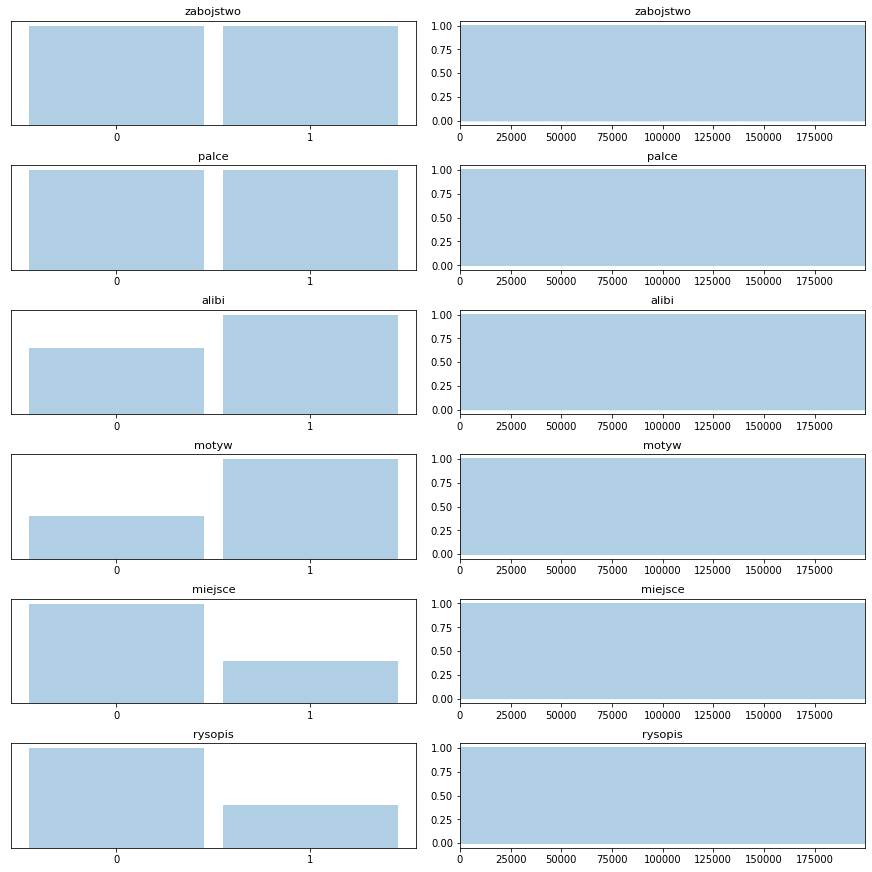

In [16]:
axs = pm.traceplot(trace, var_names=['zabojstwo', 'palce', 'alibi', 'motyw', 'miejsce', 'rysopis'])

In [18]:
# prawd. zabojstwa pod warunkiem wystąpienia odciskow palcow 
p_zabojstwo_palce = (trace.posterior['zabojstwo'].values[0]*trace.posterior['palce'].values[0]).sum()/trace.posterior['palce'].values[0].sum()
print('1.p_zabojstwo_palce:', p_zabojstwo_palce)

# prawd. zabojstwa pod warunkiem wystąpienia motywu i braku alibi 
p_zabojstwo_alibi_motyw = (trace.posterior['zabojstwo'].values[0]*trace.posterior['alibi'].values[0]*trace.posterior['motyw'].values[0]).sum()/(trace.posterior['alibi'].values[0]*trace.posterior['motyw'].values[0]).sum()
print('2.p_zabojstwo_alibi_motyw:', p_zabojstwo_alibi_motyw)

# prawd. zabojstwa pod warunkiem wystąpienia odciskow palcow,w sasiedztwie miejsca i blednego rysopisu 
p_zabojstwo_palce_miejsce_rysopis = (trace.posterior['zabojstwo'].values[0]*trace.posterior['palce'].values[0]*trace.posterior['miejsce'].values[0]*trace.posterior['rysopis'].values[0]).sum()/(trace.posterior['palce'].values[0]*trace.posterior['miejsce'].values[0]*trace.posterior['rysopis'].values[0]).sum()
print('3.p_zabojstwo_palce_miejsce_rysopis:', p_zabojstwo_palce_miejsce_rysopis)

1.p_zabojstwo_palce: 0.6997751686235324
2.p_zabojstwo_alibi_motyw: 0.7819934148841063
3.p_zabojstwo_palce_miejsce_rysopis: 0.7016546671719085


YOUR ANSWER HERE


**Prawdopodobieństwo będzie największe w przypadku nr. 2 - gdyby stwierdzono, że nie miał alibi i miał motyw.**

## Zadanie 2  (obowiązkowe, 5pkt.)

### Zamodeluj i odpowiedz na pytania.
System alarmowy w mieszkaniu, reaguje na włamania oraz, niestety, również na drobne trzęsienia (ziemi). Sąsiedzi John i Mary są umówieni, żeby zadzwonić do właściciela gdy usłyszą alarm. John jest nadgorliwy i bierze różne zdarzenia (np. dzwonek telefonu) za sygnał alarmowy (i wtedy zawsze dzwoni). Mary rozpoznaje alarm poprawnie, lecz często słucha głośnej muzyki i może go w ogóle nie usłyszeć. 

Sieć przekonań dla systemu alarmowego wygląda następująco:
![bsiec.PNG](http://torus.uck.pk.edu.pl/~amarsz/images/bsiec.PNG)

__Jakie jest prawdopodobieństwo, że:__
1. włączy się alarm?
2. doszło do włamanie jeśli wiadom, że włączył się alarm?
3. zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm?
1. w razie włamania ktoś zadzwoni?
2. zawiadomienie o włamaniu jest fałszywe?
3. rozległ się alarm, przy czym nie wystąpiło ani trzęsienie ziemi ani włamanie, ale oboje John i Mary zadzwonili? (prawd. bezwarunkowe)

TWÓJ PROGRAM:

In [36]:
#YOUR CODE HERE

with pm.Model() as model:
  earthquake = pm.Bernoulli('earthqueake', 0.002)
  
  burglary = pm.Bernoulli('burglary', 0.001)
  
  alarm_p = pm.Deterministic('alarm_p', pm.math.switch(earthquake, pm.math.switch(burglary, 0.95, 0.29), pm.math.switch(burglary, 0.94, 0.001)))
  alarm = pm.Bernoulli('alarm', alarm_p)

  JohnCalls_p = pm.Deterministic('JohnCalls_p', pm.math.switch(alarm_p, 0.90, 0.05))
  JohnCalls = pm.Bernoulli('JohnCalls', JohnCalls_p)

  MaryCalls_p = pm.Deterministic('MaryCalls_p', pm.math.switch(alarm_p, 0.70, 0.01))
  MaryCalls = pm.Bernoulli('MaryCalls', MaryCalls_p)


  burglary_fake = pm.Deterministic('burglary_fake', pm.math.switch(burglary, 0.29, 0.001))

  trace = pm.sample(400000, chains=1, return_inferencedata=True)
  

Sequential sampling (1 chains in 1 job)
BinaryGibbsMetropolis: [earthqueake, burglary, alarm, JohnCalls, MaryCalls]


Sampling 1 chain for 1_000 tune and 400_000 draw iterations (1_000 + 400_000 draws total) took 278 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


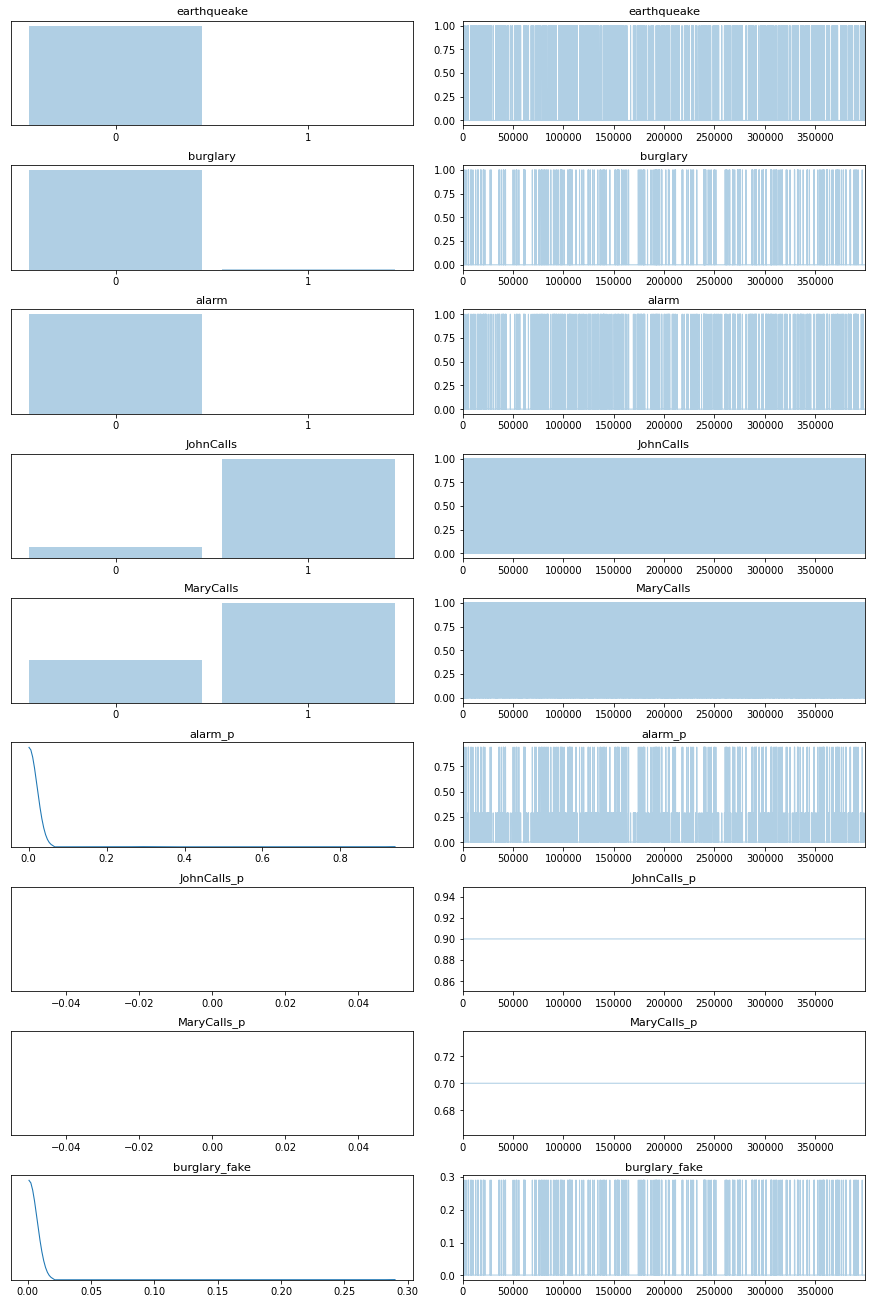

In [37]:
axs = az.plot_trace(trace)

In [40]:
#1.
p_alarm = trace.posterior['alarm'].values[0].sum()/len(trace.posterior['alarm'].values[0])
print('1.p_alarm:', p_alarm)

#2.
p_burglary_alarm = (trace.posterior['burglary'].values[0]*trace.posterior['alarm'].values[0]).sum()/(trace.posterior['alarm'].values[0]).sum()
print('2.p_burglary_alarm:', p_burglary_alarm)

#3.
p_earthquake_alarm = (trace.posterior['earthqueake'].values[0]*trace.posterior['alarm'].values[0]).sum()/(trace.posterior['alarm'].values[0]).sum()
print('3.p_earthquake_alarm:', p_earthquake_alarm)

#4 
p_burglary_calls = ((trace.posterior['JohnCalls'].values[0] | trace.posterior['MaryCalls'].values[0])*trace.posterior['burglary'].values[0]*trace.posterior['alarm'].values[0]).sum()/(trace.posterior['burglary'].values[0]*trace.posterior['alarm'].values[0]).sum()
print('4.p_burglary_calls:', p_burglary_calls)

#5 
fake_burglary = ((trace.posterior['JohnCalls'].values[0] | trace.posterior['MaryCalls'].values[0])*trace.posterior['burglary_fake'].values[0]).sum()/trace.posterior['burglary_fake'].values[0].sum()
print('5.fake_burglary:', fake_burglary)

#6 
p_call_byNothing = (trace.posterior['alarm'].values[0]*np.logical_not(trace.posterior['earthqueake'].values[0])*np.logical_not(trace.posterior['burglary'].values[0])*trace.posterior['JohnCalls'].values[0]*trace.posterior['MaryCalls'].values[0]).sum()/len(trace.posterior['alarm'].values[0])
print('6.p_call_byNothing:', p_call_byNothing)


1.p_alarm: 0.0025275
2.p_burglary_alarm: 0.37487636003956476
3.p_earthquake_alarm: 0.23936696340257171
4.p_burglary_calls: 0.9683377308707124
5.fake_burglary: 0.9680848585108984
6.p_call_byNothing: 0.000605


### ODPOWIEDŹ:
Prawdopodobieństwo, że:

1.włączy się alarm wynosi: 0.0025275

2.doszło do włamanie jeśli wiadomo, że włączył się alarm wynosi: 
 0.37487636003956476

3.zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm wynosi:
0.23936696340257171

4.w razie włamania ktoś zadzwoni wynosi: 0.9683377308707124

5.zawiadomienie o włamaniu jest fałszywe wynosi : 0.9680848585108984

6.rozległ się alarm, przy czym nie wystąpiło ani trzęsienie ziemi ani włamanie, ale oboje John i Mary zadzwonili (prawd. bezwarunkowe)  wynosi : 0.000605

__UWAGA:__ Zwróć uwagę na wielkości podanych prawdopodobieńst aby dobarć odpowiednią liczbę symulacji.

&copy; Katedra Informatyki, Politechnika Krakowska